# Data Processing and Modeling

In [103]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#-------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#-------------------------------------
from scipy.stats import shapiro

#-------------------------------------
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

#-------------------------------------
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score,recall_score, precision_score
from sklearn.metrics import average_precision_score, roc_auc_score, roc_curve, auc

#-------------------------------------
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from statsmodels.stats.outliers_influence import variance_inflation_factor

#-------------------------------------
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier


#------------------------------------- 
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE, RandomOverSampler

import warnings
warnings.filterwarnings("ignore")

In [2]:
CV = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

In [3]:
# load dataset
df = pd.read_csv("C:/Users/niniw/Documents/Capstone 3 - Educational Analysis/student_prediction.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   STUDENTID      145 non-null    object
 1   AGE            145 non-null    int64 
 2   GENDER         145 non-null    int64 
 3   HS_TYPE        145 non-null    int64 
 4   SCHOLARSHIP    145 non-null    int64 
 5   WORK           145 non-null    int64 
 6   ACTIVITY       145 non-null    int64 
 7   PARTNER        145 non-null    int64 
 8   SALARY         145 non-null    int64 
 9   TRANSPORT      145 non-null    int64 
 10  LIVING         145 non-null    int64 
 11  MOTHER_EDU     145 non-null    int64 
 12  FATHER_EDU     145 non-null    int64 
 13  #_SIBLINGS     145 non-null    int64 
 14  KIDS           145 non-null    int64 
 15  MOTHER_JOB     145 non-null    int64 
 16  FATHER_JOB     145 non-null    int64 
 17  STUDY_HRS      145 non-null    int64 
 18  READ_FREQ      145 non-null   

In [4]:
df.shape

(145, 33)

In [5]:
df.columns

Index(['STUDENTID', 'AGE', 'GENDER', 'HS_TYPE', 'SCHOLARSHIP', 'WORK',
       'ACTIVITY', 'PARTNER', 'SALARY', 'TRANSPORT', 'LIVING', 'MOTHER_EDU',
       'FATHER_EDU', '#_SIBLINGS', 'KIDS', 'MOTHER_JOB', 'FATHER_JOB',
       'STUDY_HRS', 'READ_FREQ', 'READ_FREQ_SCI', 'ATTEND_DEPT', 'IMPACT',
       'ATTEND', 'PREP_STUDY', 'PREP_EXAM', 'NOTES', 'LISTENS',
       'LIKES_DISCUSS', 'CLASSROOM', 'CUML_GPA', 'EXP_GPA', 'COURSE ID',
       'GRADE'],
      dtype='object')

In [6]:
df.dtypes

STUDENTID        object
AGE               int64
GENDER            int64
HS_TYPE           int64
SCHOLARSHIP       int64
WORK              int64
ACTIVITY          int64
PARTNER           int64
SALARY            int64
TRANSPORT         int64
LIVING            int64
MOTHER_EDU        int64
FATHER_EDU        int64
#_SIBLINGS        int64
KIDS              int64
MOTHER_JOB        int64
FATHER_JOB        int64
STUDY_HRS         int64
READ_FREQ         int64
READ_FREQ_SCI     int64
ATTEND_DEPT       int64
IMPACT            int64
ATTEND            int64
PREP_STUDY        int64
PREP_EXAM         int64
NOTES             int64
LISTENS           int64
LIKES_DISCUSS     int64
CLASSROOM         int64
CUML_GPA          int64
EXP_GPA           int64
COURSE ID         int64
GRADE             int64
dtype: object

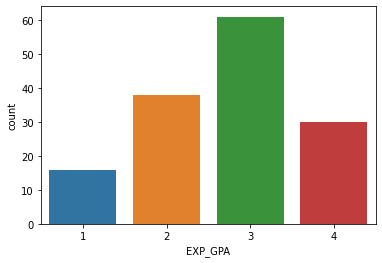

In [7]:
sns.countplot(df['EXP_GPA'],label="Count")
plt.show()

The data is imbalnced so I will perform overfittign with the following methods:
- Simple Random Oversampling
- SMOTE
- ADASYN

## Preprocesssing and Cleaning Data

In [8]:
#checking for missing values
df.isnull().sum()

STUDENTID        0
AGE              0
GENDER           0
HS_TYPE          0
SCHOLARSHIP      0
WORK             0
ACTIVITY         0
PARTNER          0
SALARY           0
TRANSPORT        0
LIVING           0
MOTHER_EDU       0
FATHER_EDU       0
#_SIBLINGS       0
KIDS             0
MOTHER_JOB       0
FATHER_JOB       0
STUDY_HRS        0
READ_FREQ        0
READ_FREQ_SCI    0
ATTEND_DEPT      0
IMPACT           0
ATTEND           0
PREP_STUDY       0
PREP_EXAM        0
NOTES            0
LISTENS          0
LIKES_DISCUSS    0
CLASSROOM        0
CUML_GPA         0
EXP_GPA          0
COURSE ID        0
GRADE            0
dtype: int64

In [9]:
df1 = df.drop(['STUDENTID'], axis =1)

In [10]:
#Checking for outliers
from scipy import stats
z = np.abs(stats.zscore(df1))
print(z)

[[0.62076591 0.81649658 1.97095572 ... 1.88766626 0.96372631 1.01712232]
 [0.62076591 0.81649658 1.97095572 ... 0.3020266  0.96372631 1.01712232]
 [0.62076591 0.81649658 0.10305651 ... 0.79281983 0.96372631 1.01712232]
 ...
 [1.01579877 1.22474487 1.7648427  ... 0.3020266  1.4986581  1.01712232]
 [0.62076591 1.22474487 0.10305651 ... 0.3020266  1.4986581  0.35268638]
 [1.01579877 1.22474487 1.7648427  ... 1.39687304 1.4986581  0.10391652]]


In [11]:
threshold = 3
print(np.where(z > 3))

(array([ 11,  15,  18,  23,  47,  55,  55,  60,  60,  61,  64,  65,  68,
        77,  79,  80,  84,  84,  93,  93, 103, 108, 109, 112, 113, 115,
       119, 119, 121, 121, 121, 135, 138, 138, 139, 143], dtype=int64), array([20, 20, 16,  7, 14, 13, 23,  7, 10, 20, 20, 20, 13, 10, 20, 20, 13,
       23,  3, 16,  7, 13, 13, 20, 20, 20, 13, 16, 13, 16, 20, 20,  7, 20,
       14,  7], dtype=int64))


In [12]:
df_o = df1[(z < 3).all(axis=1)]

In [13]:
df_o.shape

(117, 32)

In [14]:
#Checking for duplicates:
df_o.loc[df1.duplicated()].shape

(0, 32)

In [15]:
df_dummy = df_o.drop_duplicates()
df_dummy.shape

(117, 32)

No duplicated data to handle

### Creating Train/Test

In [16]:
feature_cols = ['COURSE ID','AGE','GENDER','HS_TYPE','SCHOLARSHIP','WORK','PARTNER','SALARY','TRANSPORT','LIVING','MOTHER_EDU','FATHER_EDU','#_SIBLINGS','KIDS','MOTHER_JOB','FATHER_JOB','NOTES','LISTENS','LIKES_DISCUSS','CLASSROOM','STUDY_HRS','READ_FREQ','READ_FREQ_SCI','ATTEND_DEPT','IMPACT','ATTEND','PREP_STUDY','PREP_EXAM','GRADE','CUML_GPA']
X = df_dummy[feature_cols]
y = df_dummy.EXP_GPA

In [17]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [18]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((81, 30), (36, 30))

In [19]:
#Scaling the data
scale = MinMaxScaler()
col = X_train.columns

X_train[col] = scale.fit_transform(X_train[col])
X_test[col] = scale.transform(X_test[col])

# Random Oversampling

In [20]:
#Create a copy of the data:
X_train_randOverSample = X_train.copy()
y_train_randOverSample = y_train.copy()

In [21]:
#Random Oversampling:
randOverSample = RandomOverSampler(random_state=100,)
X_train_randOverSample, y_train_randOverSample = randOverSample.fit_resample(X_train_randOverSample, y_train_randOverSample.ravel())

## Feature Selection

In [74]:
sfs_randOverSample = SFS(GradientBoostingClassifier(n_estimators=100, random_state=0),
          k_features = 5,
          forward= True,
          floating = False,
          verbose= 2,
          scoring= 'accuracy',
          cv = CV,
          n_jobs= -1).fit(X_train_randOverSample, y_train_randOverSample)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    6.5s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    8.5s finished

[2022-06-01 13:46:39] Features: 1/5 -- score: 0.5[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  29 | elapsed:    8.4s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:   10.8s finished

[2022-06-01 13:46:50] Features: 2/5 -- score: 0.6142857142857143[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  28 | elapsed:    9.0s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:   11.3s finished

[2022-06-01 13:47:01] Features: 3/5 -- score: 0.75[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  27 | elapsed:    9.6s remainin

In [75]:
print("Feature Names: ",sfs_randOverSample.k_feature_names_)

print("Score: ", sfs_randOverSample.k_score_)

Feature Names:  ('HS_TYPE', 'LIVING', '#_SIBLINGS', 'CLASSROOM', 'CUML_GPA')
Score:  0.85


In [76]:
X_train_new_randOverSample = X_train_randOverSample[['HS_TYPE','LIVING', '#_SIBLINGS', 'CLASSROOM', 'CUML_GPA']]

X_test_new_randOverSample = X_test[['HS_TYPE', 'LIVING', '#_SIBLINGS', 'CLASSROOM', 'CUML_GPA']]

In [113]:
DT = DecisionTreeClassifier(min_samples_leaf=3, min_samples_split=3, random_state=0)
cross_val_DT = cross_val_score(DT, X_train_new_randOverSample, y_train_randOverSample , cv = CV, scoring = 'accuracy' ) 
cross_val_DT_f1 = cross_val_score(DT, X_train_new_randOverSample, y_train_randOverSample , cv = CV, 
                                  scoring = 'f1_weighted') 

# --------------------------------------------------------------------------
RF = RandomForestClassifier(criterion='entropy', min_samples_leaf=2,min_samples_split=6, n_estimators=25, random_state=0)
cross_val_RF = cross_val_score(RF, X_train_new_randOverSample, y_train_randOverSample , cv = CV, scoring = 'accuracy') 
cross_val_RF_f1 = cross_val_score(RF, X_train_new_randOverSample, y_train_randOverSample , cv = CV, 
                                  scoring = 'f1_weighted') 

# --------------------------------------------------------------------------
NN = MLPClassifier(activation='tanh', hidden_layer_sizes=20, learning_rate_init=0.025, max_iter=100, random_state=0)
cross_val_NN = cross_val_score(NN, X_train_new_randOverSample, y_train_randOverSample , cv = CV, scoring = 'accuracy') 
cross_val_NN_f1 = cross_val_score(NN, X_train_new_randOverSample, y_train_randOverSample , cv = CV, 
                                   scoring = 'f1_weighted') 
# --------------------------------------------------------------------------
KNN = KNeighborsClassifier(n_neighbors=19)
cross_val_KNN = cross_val_score(KNN, X_train_new_randOverSample, y_train_randOverSample , cv = CV, 
                                scoring = 'accuracy') 
cross_val_KNN_f1 = cross_val_score(KNN, X_train_new_randOverSample, y_train_randOverSample , cv = CV, 
                                   scoring = 'f1_weighted') 

In [126]:
compare_models = [('Decision Tree', cross_val_DT.mean(),cross_val_DT_f1.mean()),
                  ('Random Forest', cross_val_RF.mean(),cross_val_RF_f1.mean()),
                  ('Neural Network', cross_val_NN.mean(),cross_val_NN_f1.mean()),
                  ('KNN', cross_val_KNN.mean(),cross_val_KNN_f1.mean())
                 ]

In [127]:
predict = pd.DataFrame(data = compare_models, columns=['Model','Cross_validation_mean(accuracy)','Cross_validation_mean(f1)'])
predict.style.background_gradient(cmap='YlGn')

,Model,Cross_validation_mean(accuracy),Cross_validation_mean(f1)
0,Decision Tree,0.600000,0.592189
1,Random Forest,0.678571,0.679269
2,Neural Network,0.635714,0.617766
3,KNN,0.621429,0.576618


In [128]:
RF.fit(X_train_new_randOverSample, y_train_randOverSample)
y_test_pred_RF = RF.predict(X_test_new_randOverSample)
test_acc_RF = accuracy_score(y_test, y_test_pred_RF)
test_f1_RF = f1_score(y_test, y_test_pred_RF, average = 'weighted')


print("Test set acc: ", test_acc_RF)
print("Test set f1_weighted", test_f1_RF)

Test set acc:  0.3611111111111111
Test set f1_weighted 0.349059829059829


# SMOTE

In [120]:
X_train_smote = X_train.copy()
y_train_smote = y_train.copy()

In [121]:
#SMOTE
sm = SMOTE(random_state=100)
X_train_smote, y_train_smote = sm.fit_resample(X_train_smote, y_train_smote.ravel())

In [83]:
sfs = SFS(GradientBoostingClassifier(n_estimators=100, random_state=0),
          k_features = 5,
          forward= True,
          floating = False,
          verbose= 2,
          scoring= 'accuracy',
          cv = CV,
          n_jobs= -1).fit(X_train_smote, y_train_smote)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    8.1s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   10.3s finished

[2022-06-01 13:48:05] Features: 1/5 -- score: 0.5928571428571429[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  29 | elapsed:    9.7s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:   12.2s finished

[2022-06-01 13:48:17] Features: 2/5 -- score: 0.6500000000000001[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  28 | elapsed:    9.1s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:   11.5s finished

[2022-06-01 13:48:29] Features: 3/5 -- score: 0.7214285714285715[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  2

In [84]:
print("Feature Names: ",sfs.k_feature_names_)
print("Score: ", sfs.k_score_)

Feature Names:  ('KIDS', 'READ_FREQ', 'READ_FREQ_SCI', 'GRADE', 'CUML_GPA')
Score:  0.7714285714285716


In [85]:
X_train_new_smote = X_train_smote[['KIDS', 'READ_FREQ', 'READ_FREQ_SCI', 'GRADE', 'CUML_GPA']]

X_test_new_smote = X_test[['KIDS', 'READ_FREQ', 'READ_FREQ_SCI', 'GRADE', 'CUML_GPA']]

In [129]:
DT = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4, min_samples_split=5, random_state=0)
cross_val_DT = cross_val_score(DT, X_train_new_smote, y_train_smote , cv = CV, scoring = 'accuracy' ) 
cross_val_DT_f1 = cross_val_score(DT, X_train_new_smote, y_train_smote , cv = CV, scoring = 'f1_weighted' ) 


# --------------------------------------------------------------------------
RF = RandomForestClassifier(criterion='entropy', min_samples_leaf=3,min_samples_split=5, 
                            n_estimators=200, random_state=0)
cross_val_RF = cross_val_score(RF, X_train_new_smote, y_train_smote , cv = CV, scoring = 'accuracy') 
cross_val_RF_f1 = cross_val_score(RF, X_train_new_smote, y_train_smote , cv = CV, scoring = 'f1_weighted') 

# --------------------------------------------------------------------------
NN = MLPClassifier(activation='tanh', hidden_layer_sizes=20, learning_rate_init=0.01, max_iter=100, random_state=0)
cross_val_NN = cross_val_score(NN, X_train_new_smote, y_train_smote , cv = CV, scoring = 'accuracy') 
cross_val_NN_f1 = cross_val_score(NN, X_train_new_smote, y_train_smote , cv = CV, scoring = 'f1_weighted') 

# --------------------------------------------------------------------------
KNN = KNeighborsClassifier(n_neighbors=17)
cross_val_KNN = cross_val_score(KNN, X_train_new_smote, y_train_smote , cv = CV, scoring = 'accuracy') 
cross_val_KNN_f1 = cross_val_score(KNN, X_train_new_smote, y_train_smote , cv = CV, scoring = 'f1_weighted') 

In [130]:
compare_models = [('Decision Tree', cross_val_DT.mean(),cross_val_DT_f1.mean()),
                  ('Random Forest', cross_val_RF.mean(),cross_val_RF_f1.mean()),
                 ('Neural Network', cross_val_NN.mean(),cross_val_NN_f1.mean()),
                  ('KNN', cross_val_KNN.mean(), cross_val_KNN_f1.mean())]

In [131]:
predict = pd.DataFrame(data = compare_models, columns=['Model','Cross_validation_mean(accuracy)','Cross_validation_mean(f1_score)'])
predict.style.background_gradient(cmap='YlGn')

,Model,Cross_validation_mean(accuracy),Cross_validation_mean(f1_score)
0,Decision Tree,0.600000,0.592189
1,Random Forest,0.678571,0.679269
2,Neural Network,0.635714,0.617766
3,KNN,0.621429,0.576618


In [132]:
RF.fit(X_train_new_smote, y_train_smote)
y_test_pred_RF = RF.predict(X_test_new_smote)
test_acc_RF = accuracy_score(y_test, y_test_pred_RF)
test_f1_RF = f1_score(y_test, y_test_pred_RF, average = 'weighted')


print("Test set acc: ", test_acc_RF)
print("Test set f1_weighted", test_f1_RF)

Test set acc:  0.4722222222222222
Test set f1_weighted 0.45133903133903136


# ADASYN

In [133]:
X_train_adasyn = X_train.copy()
y_train_adasyn = y_train.copy()

In [134]:
sfs_adasyn = SFS(GradientBoostingClassifier(n_estimators=100, random_state=0),
          k_features = 5,
          forward= True,
          floating = False,
          verbose= 2,
          scoring= 'accuracy',
          cv = CV,
          n_jobs= -1).fit(X_train_adasyn, y_train_adasyn)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    8.7s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   10.8s finished

[2022-06-01 14:19:02] Features: 1/5 -- score: 0.5680555555555555[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  29 | elapsed:    8.5s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:   10.8s finished

[2022-06-01 14:19:13] Features: 2/5 -- score: 0.6152777777777778[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  28 | elapsed:    8.6s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:   10.9s finished

[2022-06-01 14:19:24] Features: 3/5 -- score: 0.6277777777777778[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  2

In [136]:
print("Feature Names: ",sfs_adasyn.k_feature_names_)
print("Score: ", sfs_adasyn.k_score_)

Feature Names:  ('MOTHER_EDU', 'NOTES', 'READ_FREQ', 'IMPACT', 'CUML_GPA')
Score:  0.5791666666666666


In [137]:
X_train_new_adasyn = X_train_adasyn[['MOTHER_EDU', 'NOTES', 'READ_FREQ', 'IMPACT', 'CUML_GPA']]

X_test_new_adasyn = X_test[['MOTHER_EDU', 'NOTES', 'READ_FREQ', 'IMPACT', 'CUML_GPA']]

In [138]:
DT = DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=5, random_state=0)
cross_val_DT = cross_val_score(DT, X_train_new_adasyn, y_train_adasyn , cv = CV, scoring = 'accuracy') 
cross_val_DT_f1 = cross_val_score(DT, X_train_new_adasyn, y_train_adasyn , cv = CV, scoring = 'f1_weighted') 

# --------------------------------------------------------------------------
RF = RandomForestClassifier(min_samples_leaf=2, min_samples_split=4, random_state=0)
cross_val_RF = cross_val_score(RF, X_train_new_adasyn, y_train_adasyn , cv = CV, scoring = 'accuracy') 
cross_val_RF_f1 = cross_val_score(RF, X_train_new_adasyn, y_train_adasyn , cv = CV, scoring = 'f1_weighted') 

# --------------------------------------------------------------------------
NN = MLPClassifier(activation='tanh', hidden_layer_sizes=(20, 30), learning_rate_init=0.1, random_state=0, solver='sgd')
cross_val_NN = cross_val_score(NN, X_train_new_adasyn, y_train_adasyn , cv = CV, scoring = 'accuracy') 
cross_val_NN_f1 = cross_val_score(NN, X_train_new_adasyn, y_train_adasyn , cv = CV, scoring = 'f1_weighted') 

# --------------------------------------------------------------------------
KNN = KNeighborsClassifier(n_neighbors=18)
cross_val_KNN = cross_val_score(KNN, X_train_new_adasyn, y_train_adasyn , cv = CV, scoring = 'accuracy') 
cross_val_KNN_f1 = cross_val_score(KNN, X_train_new_adasyn, y_train_adasyn , cv = CV, scoring = 'f1_weighted') 


In [139]:
compare_models = [('Decision Tree', cross_val_DT.mean(),cross_val_DT_f1.mean()),
                  ('Random Forest', cross_val_RF.mean(),cross_val_RF_f1.mean()),
                 ('Neural Network', cross_val_NN.mean(),cross_val_NN_f1.mean()),
                  ('KNN', cross_val_KNN.mean(), cross_val_KNN_f1.mean()),
                  ]

In [140]:
predict = pd.DataFrame(data = compare_models, columns=['Model','Cross_validation_mean(accuracy)','Cross_validation_mean(f1_score)'])
predict.style.background_gradient(cmap='YlGn')

,Model,Cross_validation_mean(accuracy),Cross_validation_mean(f1_score)
0,Decision Tree,0.566667,0.530476
1,Random Forest,0.541667,0.519345
2,Neural Network,0.591667,0.562282
3,KNN,0.433333,0.324848


In [141]:
NN.fit(X_train_new_adasyn, y_train_adasyn)
y_test_pred_NN = NN.predict(X_test_new_adasyn)
test_acc_NN = accuracy_score(y_test, y_test_pred_NN)
test_f1_NN = f1_score(y_test, y_test_pred_NN, average = 'weighted')

print("Test set Accuracy: ", test_acc_NN)
print("Test set f1_weighted", test_f1_NN)

Test set Accuracy:  0.5833333333333334
Test set f1_weighted 0.5527490223142397


# Conclusion and Summary

From exploring the data, we discovered that the data was imbalnced. In order to handle our small data set, I decided to go with oversampling the data in 3 different methods: 
- Random Oversampling
- SMOTE
- ADASYN

From there I then used 4 different classification models to help create predictions of EXP_GPA:
- Decision Tree
- Random Forest
- Neural Netowrks
- KNN

From the results of each model and the oversampling methods, it seems as though the best model is a Neural Network with the oversampling method of ADASYN. Other oversampling methods resulted in overfitting of the data whereas the ADASYN method was better suited in generalizing over the model. 
The following features that were realted to the model includes:
- MOTHER_EDU
- NOTES
- READ_FREQ
- IMPACT
- CUML_GPA

With an accuracy score of ~59% and f1 sccore of ~56, we can perform further resaserch to improve the models. 